<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Estructura
<br>
<br>

* * *

Alumno: Fernando Torres <br>
Fecha: 2 de octubre 2024 <br>

* * *

<br>
<br>

### Introduccion
El pronóstico de series de tiempo es una herramienta fundamental en el análisis de datos, especialmente en el ámbito financiero y energético. A medida que las empresas buscan optimizar su operación y tomar decisiones informadas, la capacidad de predecir la demanda y el comportamiento del mercado se convierte en un activo invaluable. En este contexto, utilizaremos datos históricos de precios de acciones y métricas relacionadas de NextEra Energy, obtenidos a través de Yahoo Finance, para realizar un análisis de series de tiempo en Python.

### Definicion
Las series de tiempo son conjuntos de datos recogidos o registrados en intervalos regulares de tiempo. Estas series pueden reflejar distintos fenómenos, como el consumo de energía, la producción eléctrica, o el precio de acciones, y son esenciales para identificar tendencias, patrones estacionales y ciclos en los datos. El análisis de series de tiempo permite a las empresas anticipar cambios futuros y adaptar su estrategia de negocio en consecuencia.

### Objetivo
El objetivo de este análisis es examinar y modelar las series de tiempo de los datos históricos de NextEra Energy durante los últimos 10 años. Esto incluirá la recopilación de datos, la identificación de patrones y tendencias, y la implementación de modelos de pronóstico utilizando Python. Al final del estudio, se espera proporcionar pronósticos precisos sobre el comportamiento futuro de los precios de las acciones de NextEra Energy, lo que podría servir como guía para la toma de decisiones estratégicas en el ámbito financiero.

#### - ¿Cuál es el motivo o la necesidad de pronosticar? 
Pronosticar los precios de cierre de las acciones es esencial para inversores y analistas financieros, ya que les permite tomar decisiones informadas sobre la compra, venta o retención de acciones. Entender las tendencias futuras puede ayudar a maximizar el rendimiento de las inversiones y gestionar el riesgo.
#### - ¿Cuánto tiempo en el futuro es necesario pronosticar y por qué?
Se buscará pronosticar los precios de cierre para un horizonte de 6 a 12 meses en el futuro. Este rango permite a los inversores planificar sus estrategias a medio plazo, lo que es útil en un entorno financiero en constante cambio.
#### - ¿Estos datos, en el mundo real que representan?
Estos datos representan el rendimiento de una de las compañías de energía más grandes y sostenibles en EE. UU., lo que tiene implicaciones tanto para los inversores como para la política energética y ambiental.

#### - ¿Cómo se recopilan? 
Los datos de precios de cierre se recopilan a través de Yahoo Finance, una plataforma que ofrece información financiera y datos históricos de mercado.
#### - ¿Cada cuanto se recopilan?
Dado que se utilizarán precios de cierre mensuales, los datos se recopilan una vez al mes.
#### - ¿Desde cuándo existen o desde cuándo vas a utilizar?
Se utilizarán datos de los últimos 10 años, es decir, desde aproximadamente octubre de 2014 hasta octubre de 2024.
#### - ¿De dónde se obtienen?
Los datos se obtendrán de Yahoo Finance


#### - ¿Cuáles son las características de la serie de tiempo?
Tiene una tendencia alcista desde las fechas usadas. Hasta 2021 donde parece haber una ligera correccion o estabilizacion hasta 2024. Se mira una patron estacional que se repite anualmente consistente. Esto puede ser debido a los ultimos 3 meses de cada year que suele haber vacaciones o navidad. 
#### - ¿tiene patrones? ¿valores atípicos? 
Sus patrones son las estacionalidades como ya comentaba se repite las fechas calurosas o de vacaciones y sus valores atipicos podrian ser su punto mas alto a finales de 2021 y su caida mas grande despues a principios de 2024
#### - ¿Cuáles son las medidas estadísticas de tendencia central y de dispersión?
La media de 47.18 la mediana de 44.46, la desviacion estandar de 22.09 y la varianza de 488.36

[*********************100%%**********************]  1 of 1 completed


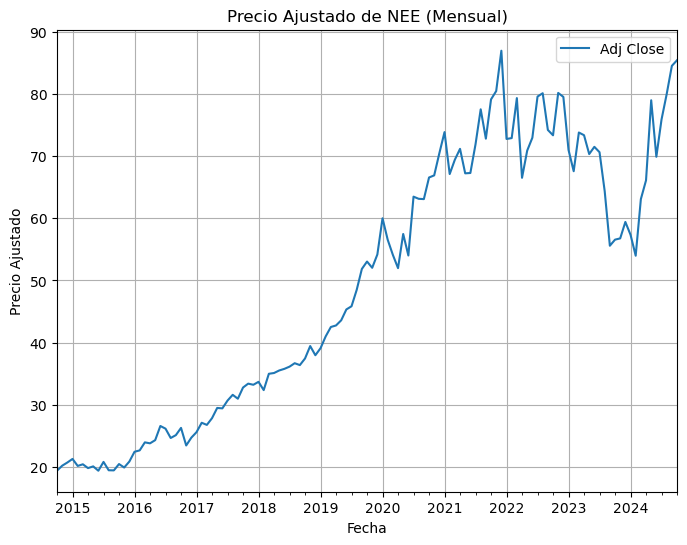

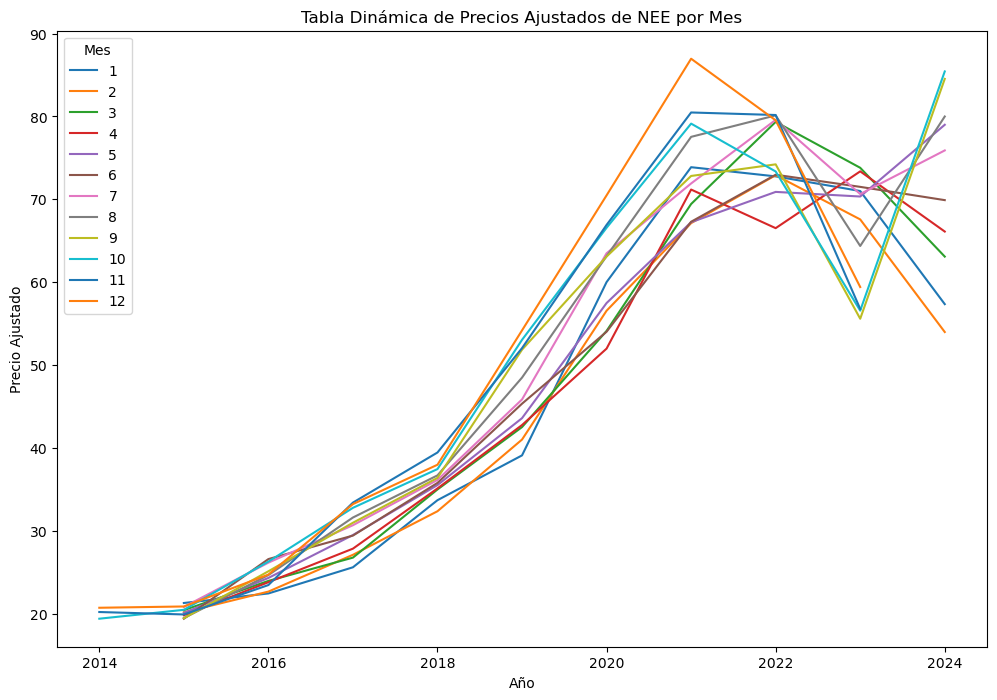

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar los datos
stocks = ['NEE']
data = yf.download(stocks, start='2014-10-01', interval='1mo')

# Crear un DataFrame solo con la columna 'Adj Close'
adj_close_df = data[['Adj Close']].copy()

# Graficar los precios ajustados
adj_close_df.plot(figsize=(8, 6), grid=True)
plt.title('Precio Ajustado de NEE (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.show()

# Obtener el índice de año y mes
piv_index = adj_close_df.index.year
piv_season = adj_close_df.index.month

# Crear una tabla dinámica
piv = pd.pivot_table(adj_close_df, index=piv_index, columns=piv_season, values='Adj Close')

# Graficar la tabla dinámica
piv.plot(figsize=(12, 8))
plt.title('Tabla Dinámica de Precios Ajustados de NEE por Mes')
plt.xlabel('Año')
plt.ylabel('Precio Ajustado')
plt.legend(title='Mes')
plt.show()


[*********************100%%**********************]  1 of 1 completed


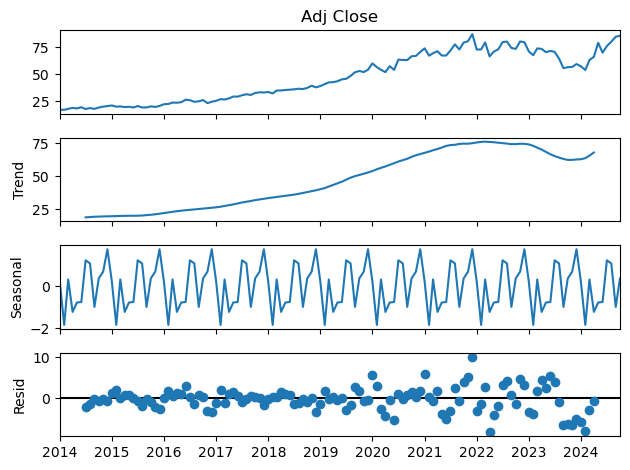

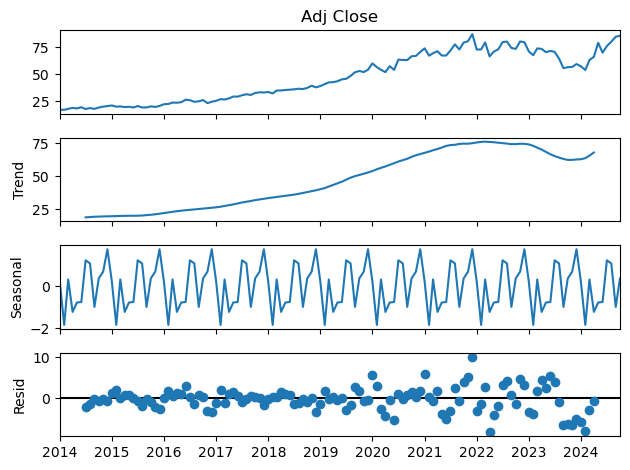

In [24]:
stocks = ['NEE']
d = yf.download(stocks, start='2014-01-01', interval='1mo')['Adj Close']
from statsmodels.tsa.seasonal import seasonal_decompose, STL
result = seasonal_decompose(d, model='additive')
result.plot()

In [25]:
d.describe()

count    130.000000
mean      47.182979
std       22.099019
min       17.287584
25%       25.240596
50%       44.467867
75%       68.968145
max       86.963440
Name: Adj Close, dtype: float64

In [27]:
# Calcular las medidas estadísticas de tendencia central y dispersión
mean_d = d.mean()  # Media
median_d = d.median()  # Mediana
std_d = d.std()  # Desviación estándar
var_d = d.var()  # Varianza

mean_d, median_d, std_d, var_d


(47.182979466364934, 44.46786689758301, 22.099019103199332, 488.36664532356895)